In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib pyodbc

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import pyodbc as con
import matplotlib.pyplot as plt

In [36]:
import pandas as pd
import pyodbc
connection_string = 'DRIVER={ODBC Driver 17 for SQL Server};SERVER=DESKTOP-JLFVPGL;DATABASE=Supply_Chain;Trusted_Connection=yes'
conn = pyodbc.connect(connection_string)
df_customer_sales = pd.read_sql('SELECT * FROM Vw_Customers_Orders_Shipping', conn)
df_inventory_product_details = pd.read_sql('SELECT * FROM Vw_Product_Inventory', conn)
conn.close()

C:\Users\Marian Youssef\AppData\Local\Temp\ipykernel_18000\1723189645.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customer_sales = pd.read_sql('SELECT * FROM Vw_Customers_Orders_Shipping', conn)
C:\Users\Marian Youssef\AppData\Local\Temp\ipykernel_18000\1723189645.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_inventory_product_details = pd.read_sql('SELECT * FROM Vw_Product_Inventory', conn)


In [10]:
def data_Specs(SC):
    print("Initial Specs on your data =================== \n")
    
    # Data Shape
    print("Data Shape: ", SC.shape)
    print("\n---------------------------------------------\n")
    
    # Categorical Columns
    s = (SC.dtypes == 'object')
    Cat_cols = list(s[s].index) 
    print("Category Columns (", len(Cat_cols), ") : \n", Cat_cols)
    print("\n---------------------------------------------\n")
    
    # Numeric Columns
    s = (SC.dtypes != 'object')
    Nums_cols = list(s[s].index)
    print("Numeric Columns (", len(Nums_cols), ") : \n", Nums_cols)
    print("\n---------------------------------------------\n")
    
    # Null Ratio per Column
    print("Null Ratio per Column: \n")
    print(SC.isnull().sum() / len(SC) * 100)
    print("\n---------------------------------------------\n")
    
    # Summary Statistics for Numeric Columns
    print("Summary Statistics for Numeric Columns: \n")
    print(SC.describe())
    print("\n---------------------------------------------\n")


In [11]:
data_Specs(df_customer_sales)

Initial Specs on your data =================== 

Data Shape:  (180519, 39)

---------------------------------------------

Category Columns ( 17 ) : 
 ['Customer_Name', 'Customer_Segment', 'Customer_Street', 'Customer_City', 'Customer_State', 'Customer_Country', 'Discount_Rate', 'Order_Status', 'Order_City', 'Order_State', 'Order_Region', 'Order_Country', 'Type_of_Payment', 'Delivery_Status', 'Shipping_Mode', 'Shipping_Date_only', 'Shipping_Time_only']

---------------------------------------------

Numeric Columns ( 22 ) : 
 ['Customer_ID', 'Customer_Zipcode', 'Order_Item_ID', 'Order_ID', 'Product_ID', 'Order_Item_Cardprod_Id', 'Discount_Value', 'Product_Price', 'Profit_Ratio', 'Quantity', 'Total', 'Profit_Per_Order', 'Sales', 'Expr1', 'Order_Customer_ID', 'Order_Date_and_Tme', 'Expr2', 'Shipping_Date', 'Days_for_shipment_Scheduled', 'Days_for_shipping_Real', 'Latitude', 'Longitude']

---------------------------------------------

Null Ratio per Column: 

Customer_ID                  

In [12]:
data_Specs(df_inventory_product_details)

Initial Specs on your data =================== 

Data Shape:  (118, 19)

---------------------------------------------

Category Columns ( 6 ) : 
 ['Product_Name', 'Class', 'Category_Name', 'Department_Name', 'Expr2', 'Order_Now']

---------------------------------------------

Numeric Columns ( 13 ) : 
 ['Product_Id', 'Product_Price', 'Product_Category_Id', 'Department_Id', 'Expr1', 'Avg_Lead_Time', 'Max_Lead_Time', 'Avg_Order_Quantity', 'Max_order_Quantity', 'Current_Stock', 'Mod', 'Reorder_Point', 'Safety_Stock']

---------------------------------------------

Null Ratio per Column: 

Product_Id             0.0
Product_Name           0.0
Product_Price          0.0
Class                  0.0
Product_Category_Id    0.0
Category_Name          0.0
Department_Id          0.0
Department_Name        0.0
Expr1                  0.0
Expr2                  0.0
Order_Now              0.0
Avg_Lead_Time          0.0
Max_Lead_Time          0.0
Avg_Order_Quantity     0.0
Max_order_Quantity     0.0


In [8]:
df_customer_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Customer_ID                  180519 non-null  int64         
 1   Customer_Name                180519 non-null  object        
 2   Customer_Segment             180519 non-null  object        
 3   Customer_Street              180519 non-null  object        
 4   Customer_City                180519 non-null  object        
 5   Customer_State               180519 non-null  object        
 6   Customer_Country             180519 non-null  object        
 7   Customer_Zipcode             180516 non-null  float64       
 8   Order_Item_ID                180519 non-null  int64         
 9   Order_ID                     180519 non-null  int64         
 10  Product_ID                   180519 non-null  int64         
 11  Order_Item_Cardprod_Id    

In [13]:
df_inventory_product_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Id           118 non-null    int64  
 1   Product_Name         118 non-null    object 
 2   Product_Price        118 non-null    float64
 3   Class                118 non-null    object 
 4   Product_Category_Id  118 non-null    int64  
 5   Category_Name        118 non-null    object 
 6   Department_Id        118 non-null    int64  
 7   Department_Name      118 non-null    object 
 8   Expr1                118 non-null    int64  
 9   Expr2                118 non-null    object 
 10  Order_Now            118 non-null    object 
 11  Avg_Lead_Time        118 non-null    int64  
 12  Max_Lead_Time        118 non-null    int64  
 13  Avg_Order_Quantity   118 non-null    int64  
 14  Max_order_Quantity   118 non-null    int64  
 15  Current_Stock        118 non-null    int

In [14]:
df_customer_sales


,Customer_ID,Customer_Name,Customer_Segment,Customer_Street,Customer_City,Customer_State,Customer_Country,Customer_Zipcode,Order_Item_ID,Order_ID,...,Delivery_Status,Expr2,Shipping_Date,Shipping_Mode,Days_for_shipment_Scheduled,Days_for_shipping_Real,Shipping_Date_only,Shipping_Time_only,Latitude,Longitude
0,256,David Rodriguez,Consumer,7605 Tawny Horse Falls,Chicago,IL,EE. UU.,60625.0,3,2,...,Advance,2,2015-04-01 00:21:00,Standard Class,4,3,2015-04-01,00:21:00,41.832722,-87.980484
1,256,David Rodriguez,Consumer,7605 Tawny Horse Falls,Chicago,IL,EE. UU.,60625.0,2,2,...,Advance,2,2015-04-01 00:21:00,Standard Class,4,3,2015-04-01,00:21:00,41.832722,-87.980484
2,8827,Brian Wilson,Home Office,8396 High Corners,San Antonio,TX,EE. UU.,78240.0,6,4,...,Late,4,2015-06-01 01:03:00,Standard Class,4,5,2015-06-01,01:03:00,29.520010,-98.637413
3,8827,Brian Wilson,Home Office,8396 High Corners,San Antonio,TX,EE. UU.,78240.0,5,4,...,Late,4,2015-06-01 01:03:00,Standard Class,4,5,2015-06-01,01:03:00,29.520010,-98.637413
4,8827,Brian Wilson,Home Office,8396 High Corners,San Antonio,TX,EE. UU.,78240.0,8,4,...,Late,4,2015-06-01 01:03:00,Standard Class,4,5,2015-06-01,01:03:00,29.520010,-98.637413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,8547,Melissa Cunningham,Corporate,1065 Iron Lake Island,Pompano Beach,FL,EE. UU.,33064.0,59222,23671,...,Advance,23671,2015-12-14 12:39:00,Standard Class,4,2,2015-12-14,12:39:00,26.283251,-80.096565
180515,3027,Mary Stevens,Corporate,6097 Amber Rabbit Impasse,Caguas,PR,Puerto Rico,725.0,59226,23672,...,Late,23672,2015-12-15 13:00:00,Second Class,2,3,2015-12-15,13:00:00,18.214447,-66.370567
180516,3027,Mary Stevens,Corporate,6097 Amber Rabbit Impasse,Caguas,PR,Puerto Rico,725.0,59225,23672,...,Late,23672,2015-12-15 13:00:00,Second Class,2,3,2015-12-15,13:00:00,18.214447,-66.370567
180517,3027,Mary Stevens,Corporate,6097 Amber Rabbit Impasse,Caguas,PR,Puerto Rico,725.0,59228,23672,...,Late,23672,2015-12-15 13:00:00,Second Class,2,3,2015-12-15,13:00:00,18.214447,-66.370567


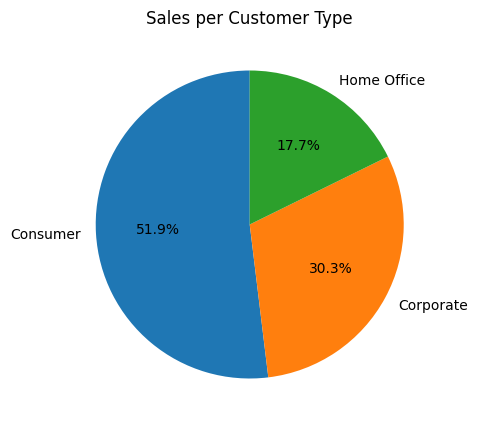

In [15]:
sales_by_customer_type = df_customer_sales.groupby('Customer_Segment')['Total'].sum()
plt.figure(figsize=(5, 5))
sales_by_customer_type.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales per Customer Type')
plt.ylabel('')
plt.show()

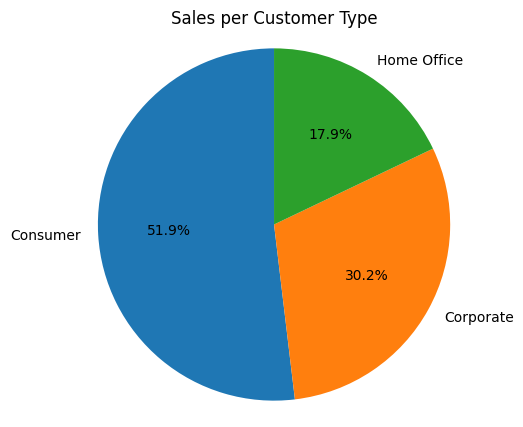

In [16]:
sales_by_customer_type = df_customer_sales.groupby('Customer_Segment')['Order_ID'].nunique().reset_index(name='Distinct_Order_Count')
plt.figure(figsize=(5, 5))
plt.pie(sales_by_customer_type['Distinct_Order_Count'], 
        labels=sales_by_customer_type['Customer_Segment'], 
        autopct='%1.1f%%', 
        startangle=90)
plt.title('Sales per Customer Type')
plt.axis('equal') 
plt.show()


In [17]:
Segment = pd.DataFrame(df_customer_sales.groupby(['Customer_Segment','Type_of_Payment'])['Order_ID'].agg('count'))
Segment

Order_ID
Customer_Segment Type_of_Payment          
Consumer         CASH                 9972
                 DEBIT               36013
                 PAYMENT             21766
                 TRANSFER            25753
Corporate        CASH                 6161
                 DEBIT               20919
                 PAYMENT             12527
                 TRANSFER            15182
Home Office      CASH                 3483
                 DEBIT               12363
                 PAYMENT              7432
                 TRANSFER             8948

In [18]:
Segment = df_customer_sales.groupby(['Customer_Segment', 'Type_of_Payment', 'Order_ID']).size().reset_index(name='Order_Count')
Segment

,Customer_Segment,Type_of_Payment,Order_ID,Order_Count
0,Consumer,CASH,1,1
1,Consumer,CASH,24,5
2,Consumer,CASH,51,2
3,Consumer,CASH,57,4
4,Consumer,CASH,61,3
...,...,...,...,...
65747,Home Office,TRANSFER,77170,1
65748,Home Office,TRANSFER,77177,1
65749,Home Office,TRANSFER,77182,1
65750,Home Office,TRANSFER,77187,1


In [14]:
Segment = df_customer_sales.groupby(['Customer_Segment', 'Type_of_Payment'])['Order_ID'].nunique().reset_index(name='Distinct_Order_Count')
total_unique_orders = df_customer_sales['Order_ID'].nunique()
Segment['Proportion_of_Distinct_Orders'] = Segment['Distinct_Order_Count'] / total_unique_orders
Segment

,Customer_Segment,Type_of_Payment,Distinct_Order_Count,Proportion_of_Distinct_Orders
0,Consumer,CASH,3704,0.056333
1,Consumer,DEBIT,13207,0.200861
2,Consumer,PAYMENT,7880,0.119844
3,Consumer,TRANSFER,9328,0.141866
4,Corporate,CASH,2246,0.034159
5,Corporate,DEBIT,7607,0.115692
6,Corporate,PAYMENT,4495,0.068363
7,Corporate,TRANSFER,5508,0.083769
8,Home Office,CASH,1299,0.019756
9,Home Office,DEBIT,4526,0.068834


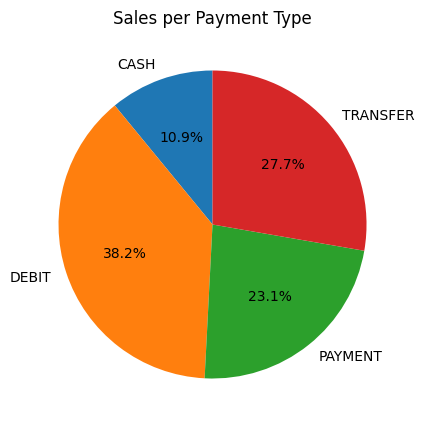

In [20]:
sales_by_Payment_type = df_customer_sales.groupby('Type_of_Payment')['Total'].sum()
plt.figure(figsize=(5, 5))
sales_by_Payment_type.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales per Payment Type')
plt.ylabel('')
plt.show()

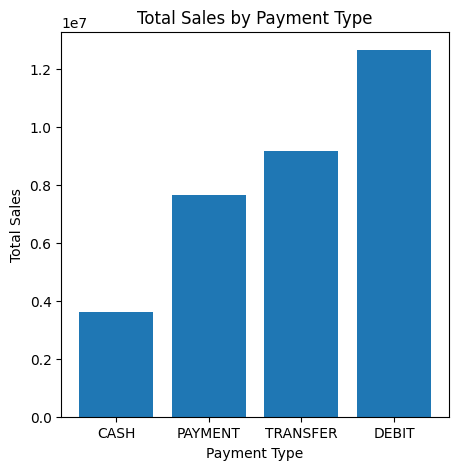

In [21]:
Sales_by_Payment_type = df_customer_sales.groupby('Type_of_Payment')['Total'].sum().sort_values()
plt.figure(figsize=[5,5])
plt.bar(x = Sales_by_Payment_type.index, height = Sales_by_Payment_type.values  )
plt.title('Total Sales by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Sales')
plt.show()

In [22]:
Order_Status=df_customer_sales["Order_Status"].value_counts()
print("Status of Orders (Number of Orders by Current Status):")
print(Order_Status)

Status of Orders (Number of Orders by Current Status):
Order_Status
Complete           59491
Pending Payment    39832
Processing         21902
Pending            20227
Closed             19616
On Hold             9804
Suspected Fraud     4062
Canceled            3692
Payment Review      1893
Name: count, dtype: int64


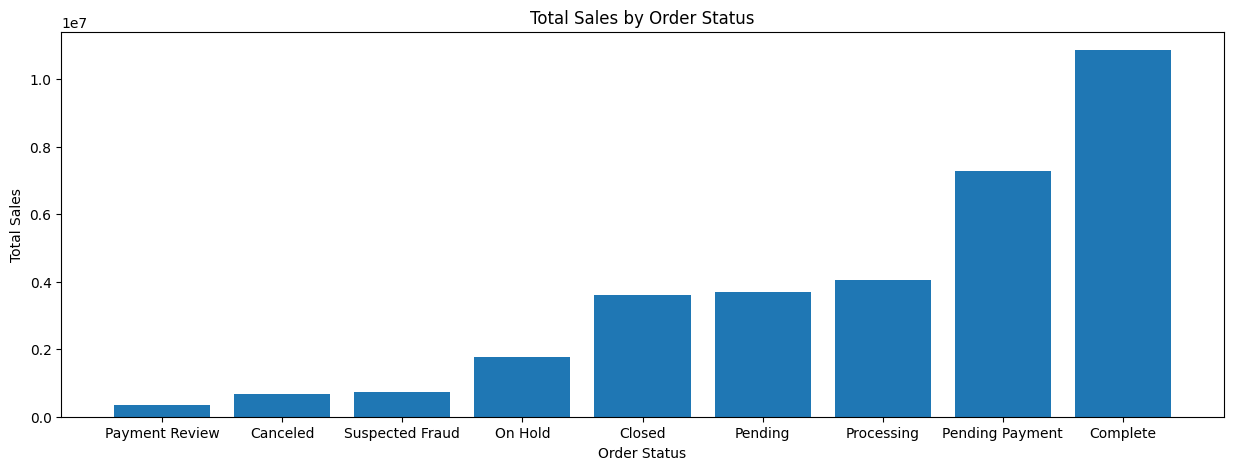

In [23]:
sales_by_Order_Status = df_customer_sales.groupby('Order_Status')['Total'].sum().sort_values()
plt.figure(figsize=[15,5])
plt.bar(x = sales_by_Order_Status.index, height = sales_by_Order_Status.values  )
plt.title('Total Sales by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Total Sales')
plt.show()

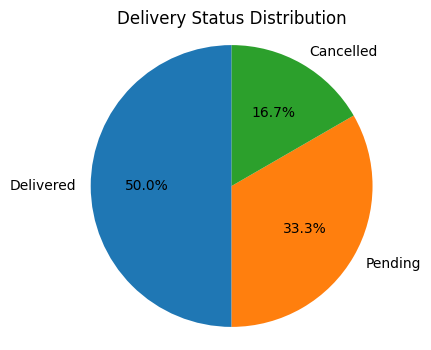

In [27]:
data = {
    'Order_ID': [1, 2, 3, 4, 5, 6],
    'Delivery_Status': ['Delivered', 'Pending', 'Delivered', 'Cancelled', 'Pending', 'Delivered']
}
df_customer_sales = pd.DataFrame(data)
delivery_status_count = df_customer_sales['Delivery_Status'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(delivery_status_count, labels=delivery_status_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Delivery Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


In [30]:
df_customer_sales.Delivery_Status.info()

<class 'pandas.core.series.Series'>
RangeIndex: 6 entries, 0 to 5
Series name: Delivery_Status
Non-Null Count  Dtype 
--------------  ----- 
6 non-null      object
dtypes: object(1)
memory usage: 180.0+ bytes


In [39]:
unique_orders = df_customer_sales['Order_ID'].nunique()
print(f"Number of Unique Orders: {unique_orders}")

Number of Unique Orders: 65752


In [40]:
unique_orders = df_customer_sales['Customer_ID'].nunique()
print(f"Number of Unique Customers: {unique_orders}")

Number of Unique Customers: 20652


In [41]:
unique_orders = df_customer_sales['Product_ID'].nunique()
print(f"Number of Unique Product: {unique_orders}")

Number of Unique Product: 118


In [42]:
total_Quantity = df_customer_sales['Quantity'].sum()
print(f"Total Quantity: {total_Quantity}")

Total Quantity: 384079


In [30]:
total_Sales = df_customer_sales['Total'].sum()
print(f"Total Sales: {total_Sales}")

Total Sales: 33054402.380095482


In [43]:
total_Profit_Per_Order = df_customer_sales['Profit_Per_Order'].sum()
print(f"Profit_Per_Order: {total_Profit_Per_Order}")

Profit_Per_Order: 3966902.9739931


In [45]:
import zipfile
import os

# Specify the folder path
folder_path = 'D:/'
zip_file_name = Python_code_Sales_Inventory.zip'

# Create a ZipFile object and add all Python files from the folder
with zipfile.ZipFile(zip_Python_Code_Sales_Inventory, 'w') as zipf:
    for root, dirs, files in os.walk(D:/):
        for file in files:
            if file.endswith('.py'):
                # Add file to the zip
                full_path = os.path.join(root, file)
                zipf.write(full_path, os.path.basename(full_path))

print(f"ZIP file {zip_file_name} created successfully.")


SyntaxError: unterminated string literal (detected at line 6) (1357951549.py, line 6)

In [55]:
import zipfile
import os

# Specify the folder path and the zip file name
folder_path = 'D:/'
zip_file_name = 'Python_code.zip'

# Create a ZipFile object and add all Python files from the folder
with zipfile.ZipFile(Python_code.zip, 'w') as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.py'):
                # Add file to the zip
                full_path = os.path.join(root, file)
                zipf.write(full_path, os.path.basename(full_path))

print(f"ZIP file {Python_code.zip} created successfully.")


NameError: name 'Python_code' is not defined

In [ ]:
import zipfile
import os

# Specify the folder path
folder_path = '/path/to/your/folder'
zip_file_name = 'your_folder_python_code.zip'

# Create a ZipFile object and add all Python files from the folder
with zipfile.ZipFile(zip_file_name, 'w') as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.py'):
                # Add file to the zip
                full_path = os.path.join(root, file)
                zipf.write(full_path, os.path.basename(full_path))

print(f"ZIP file {zip_file_name} created successfully.")
